# FAANG Stock Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

C:\Users\ARJUN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load each dataset separately
df_fb = pd.read_csv(r"C:\Users\ARJUN\Desktop\ML 2\Facebook.csv")
df_amzn = pd.read_csv(r"C:\Users\ARJUN\Desktop\ML 2\Amazon.csv")
df_apl = pd.read_csv(r"C:\Users\ARJUN\Desktop\ML 2\Apple.csv")
df_nflx = pd.read_csv(r"C:\Users\ARJUN\Desktop\ML 2\Netflix.csv")
df_goog = pd.read_csv(r"C:\Users\ARJUN\Desktop\ML 2\Google.csv")

print("Initial Row Counts:")
print("Facebook:", df_fb.shape)
print("Amazon:", df_amzn.shape)
print("Apple:", df_apl.shape)
print("Netflix:", df_nflx.shape)
print("Google:", df_goog.shape)


Initial Row Counts:
Facebook: (2076, 7)
Amazon: (5852, 7)
Apple: (10016, 7)
Netflix: (4581, 7)
Google: (4041, 7)


In [3]:
# Concatenate data and check
df_fb['Company'] = 'Facebook'
df_amzn['Company'] = 'Amazon'
df_apl['Company'] = 'Apple'
df_nflx['Company'] = 'Netflix'
df_goog['Company'] = 'Google'

df = pd.concat([df_fb, df_amzn, df_apl, df_nflx, df_goog], ignore_index=True)
print("After Concatenation:", df.shape)

After Concatenation: (26566, 8)


In [4]:
# Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,26565.000000,26565.000000,26565.000000,26565.000000,26565.000000,2.656500e+04
mean,190.406730,192.465780,188.206288,190.428805,190.224947,1.369710e+08
std,379.619521,383.523704,375.382955,379.673774,379.764606,2.640676e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,2.856000e+05
25%,1.658571,1.700000,1.628571,1.657143,1.628571,6.040800e+06
50%,33.615002,34.279999,33.080002,33.754284,33.490002,1.856200e+07
75%,193.059998,195.300003,190.545547,193.149994,193.149994,1.615040e+08
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,7.421641e+09


In [5]:
# Check for NaN values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64


In [6]:
# Drop rows where all columns are NaN
df.dropna(how='all', inplace=True)

# Fill remaining NaNs as a temporary solution for analysis
df.fillna(method='ffill', inplace=True)  # Forward fill
print("After NaN Handling:", df.shape)


After NaN Handling: (26566, 8)


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook


### Standardize Column Names and Date Formatting
Ensuring each dataset has standardized column names (Date, Open, High, Low, Close, Adj Close, Volume) and that Date is in datetime format.

In [8]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as index for time-series analysis
df.set_index('Date', inplace=True)


In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook


### Exploratory Data Analysis (EDA)

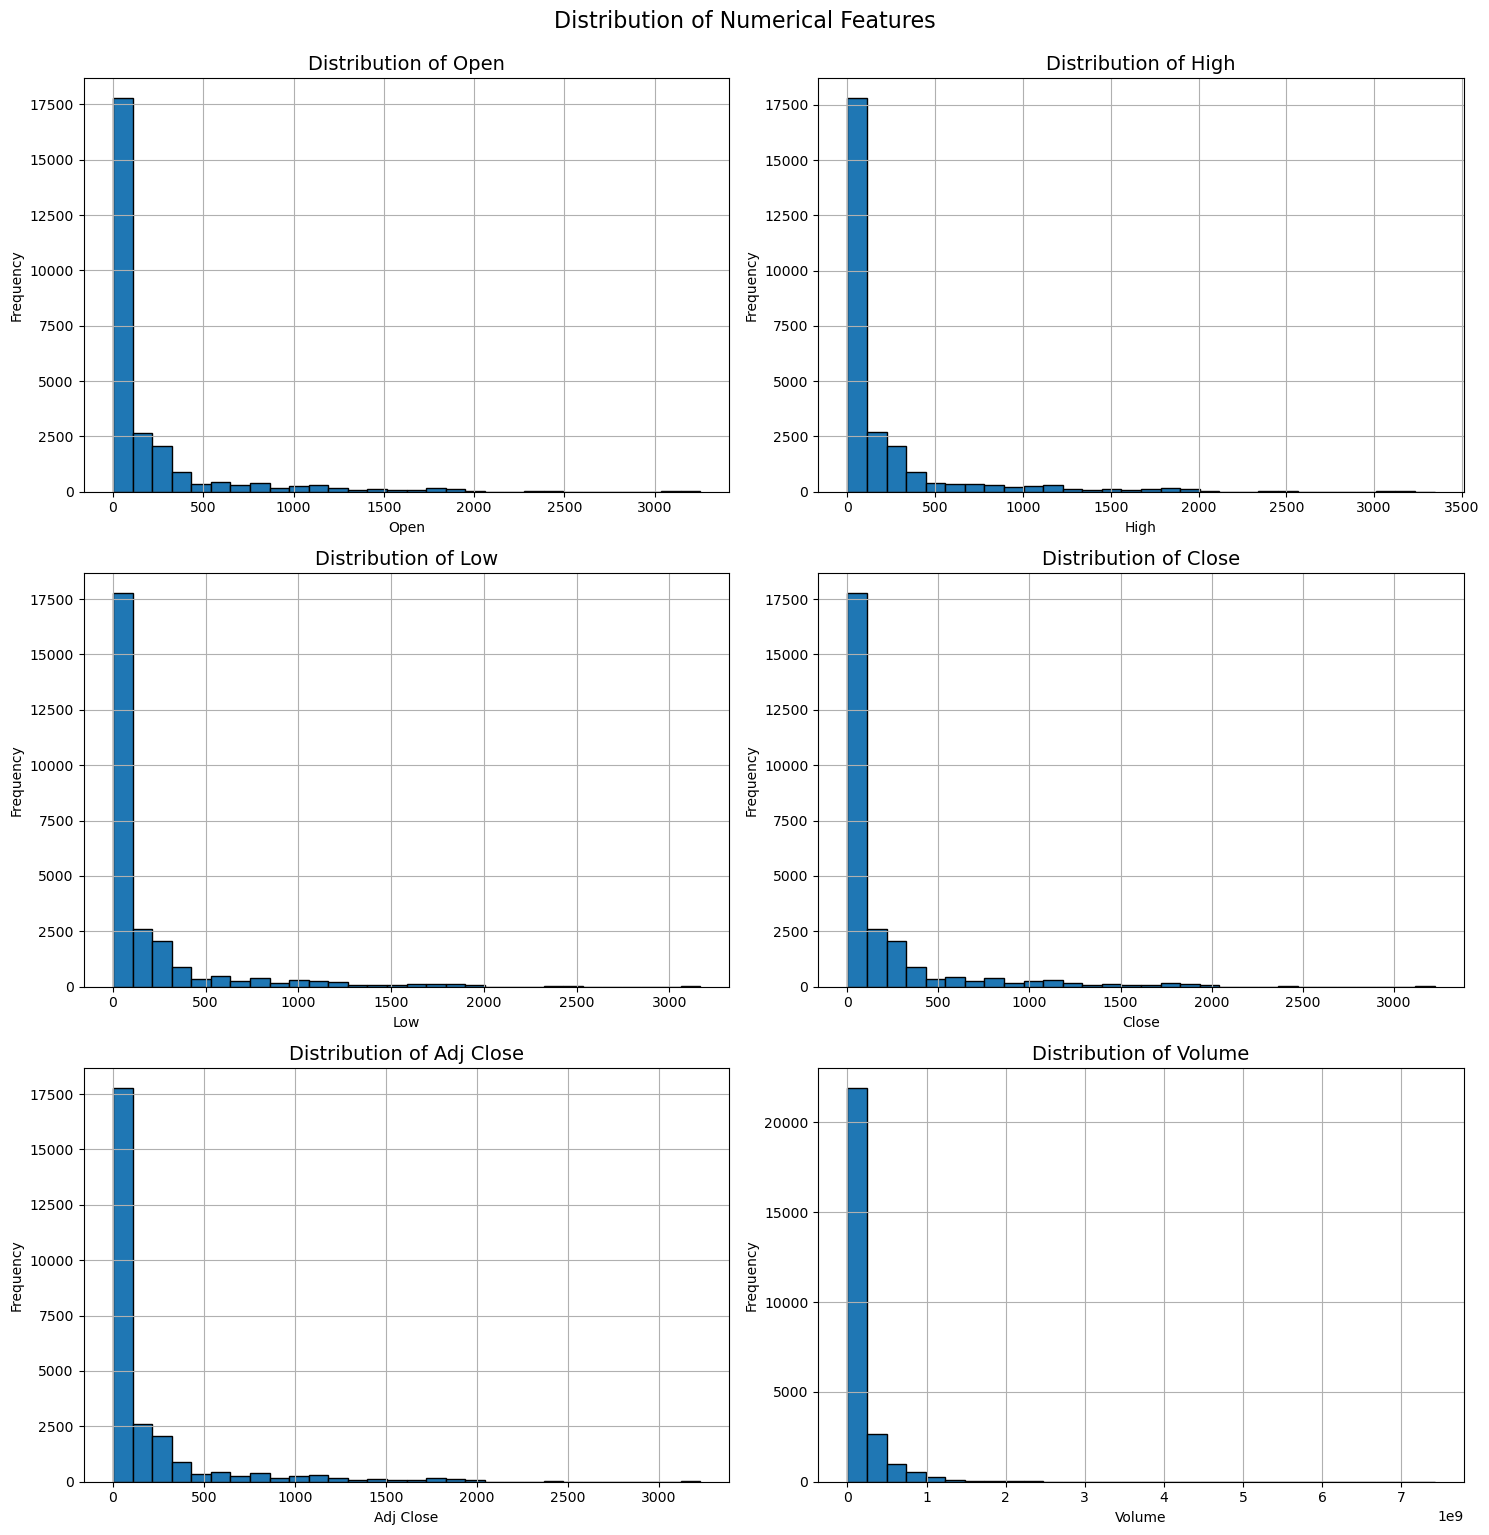

In [10]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine number of subplots needed
num_features = len(numerical_cols)
num_cols = 2  # Number of columns in the layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each feature
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)  # Adjust title position
plt.show()


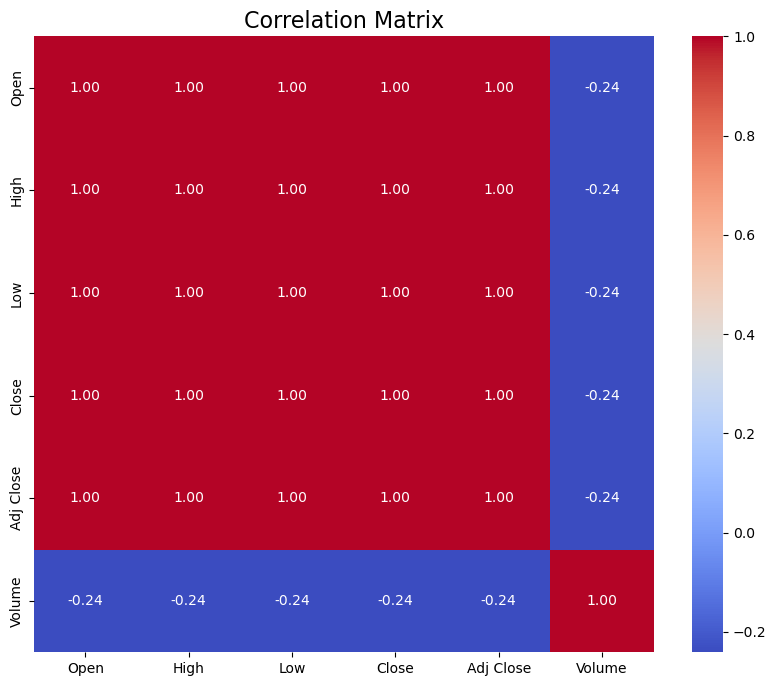

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [12]:
# Print the column names
print("DataFrame Columns:", df.columns.tolist())

DataFrame Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Company']


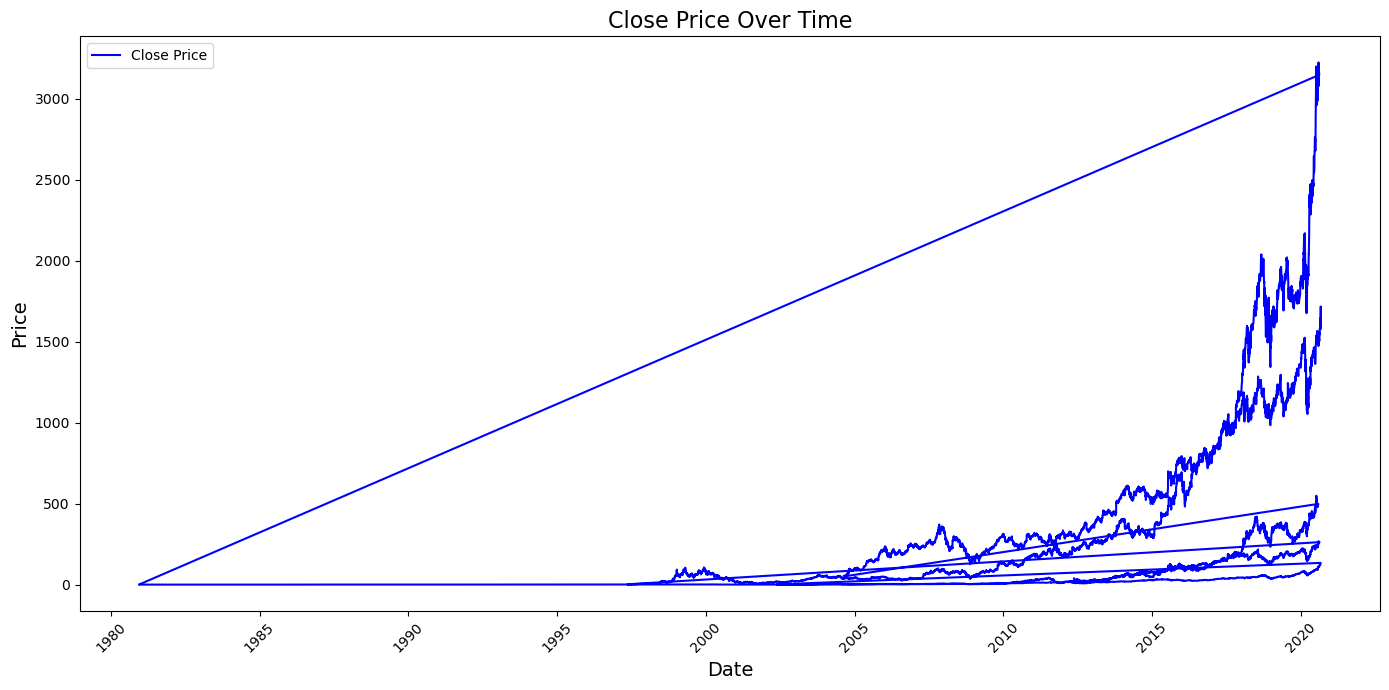

In [13]:
# Time series visualization for 'Close' prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')  # Use the index for the x-axis
plt.title('Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

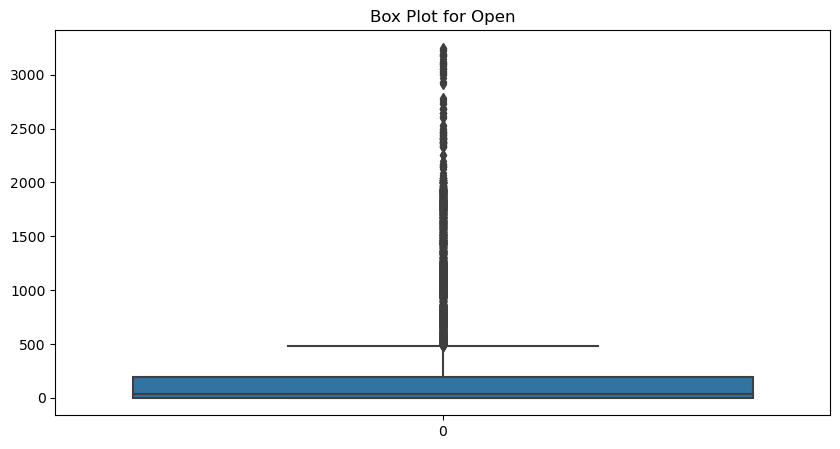

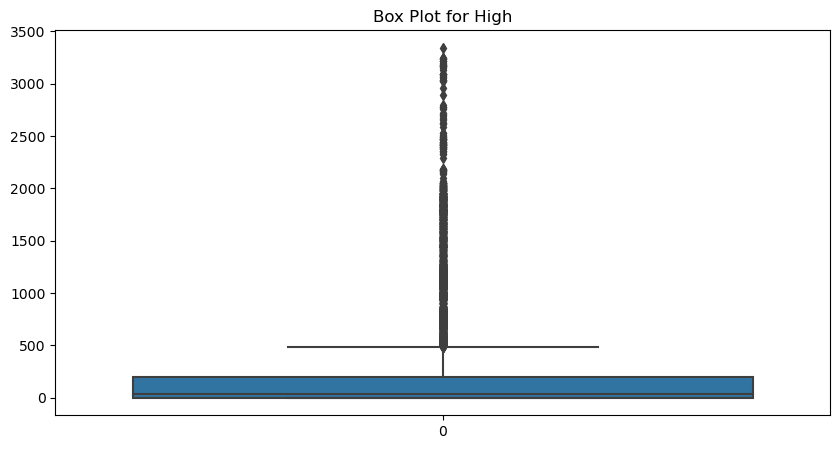

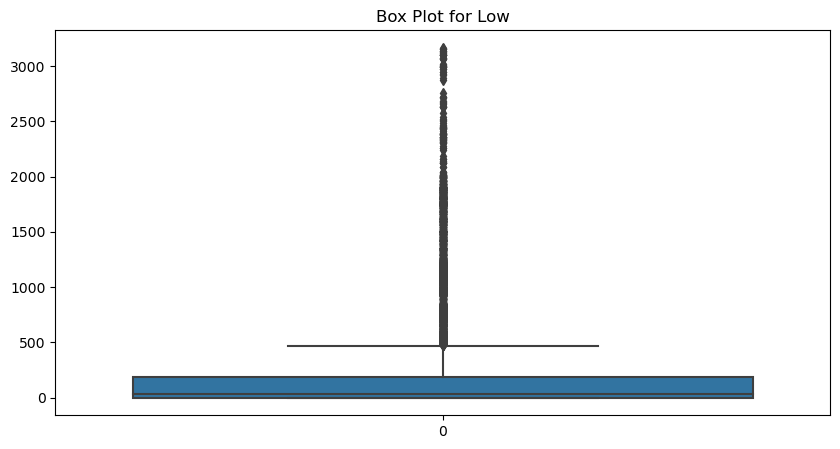

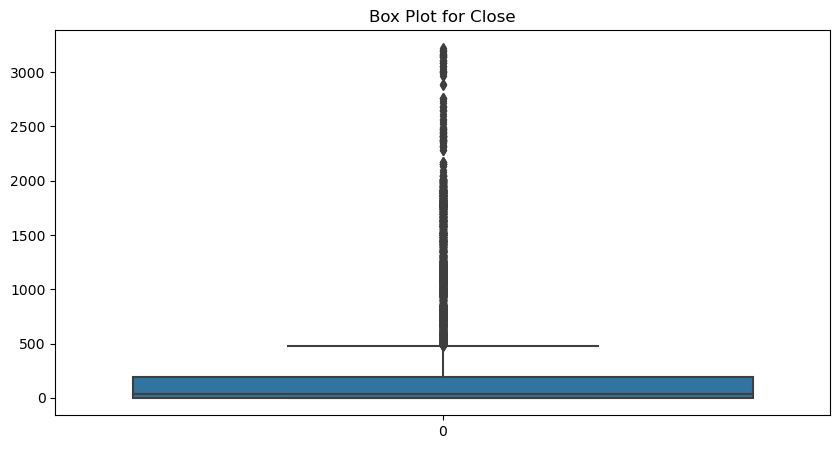

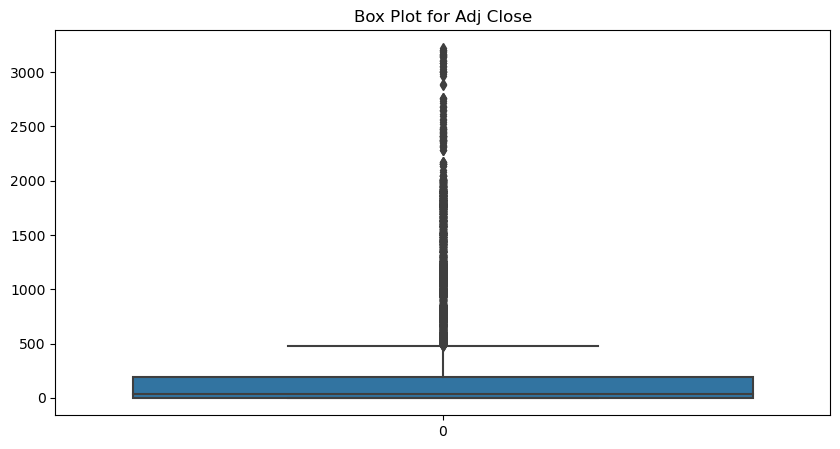

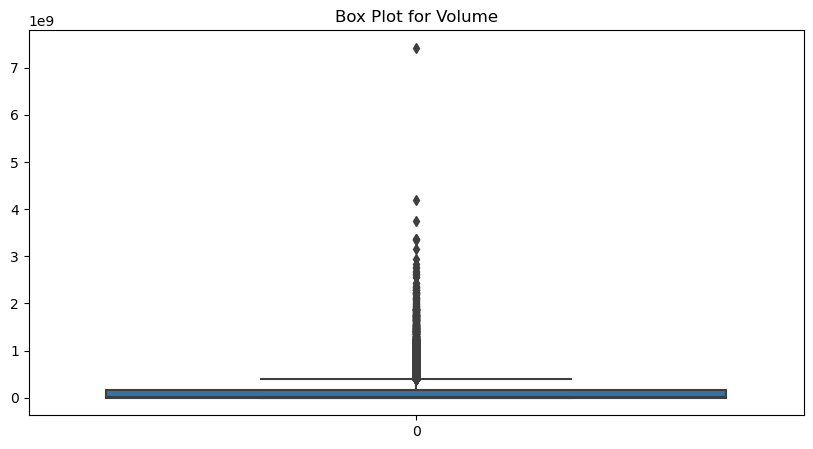

In [14]:
# Checking for outliers using box plots for numerical features
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

### Data Preprocessing and Feature Engineering

**1. Handling Missing Values:**

In [15]:
# Check for missing values
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)  # Forward fill as a basic imputation strategy


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64


**2. Feature Engineering**

In [16]:
# Creating moving average features
df['MA7'] = df['Adj Close'].rolling(window=7).mean()
df['MA21'] = df['Adj Close'].rolling(window=21).mean()
df['EMA'] = df['Adj Close'].ewm(span=20, adjust=False).mean()  # Exponential Moving Average


In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,MA7,MA21,EMA
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook,NaN,NaN,38.230000
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook,NaN,NaN,37.830000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook,NaN,NaN,37.179524
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook,NaN,NaN,36.686236
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook,NaN,NaN,36.338023


**3. Removing Outliers:**

In [18]:
# Apply the IQR method per column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier removal criteria based on IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\ARJUN\AppData\Local\Temp\ipykernel_44192\1711367395.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,MA7,MA21,EMA
Date,,,,,,,,,,
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook,NaN,NaN,37.830000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook,NaN,NaN,37.179524
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook,NaN,NaN,36.686236
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook,NaN,NaN,36.338023
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800.0,Facebook,NaN,NaN,35.916306


**4. Defining Target and Features:**

In [20]:
# Selecting features and target variable
features = df[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'EMA']]
target = df['Adj Close']


In [21]:
features.head()

,Open,High,Low,Volume,MA7,MA21,EMA
Date,,,,,,,
2012-05-21,36.529999,36.660000,33.000000,168192700.0,NaN,NaN,37.830000
2012-05-22,32.610001,33.590000,30.940001,101786600.0,NaN,NaN,37.179524
2012-05-23,31.370001,32.500000,31.360001,73600000.0,NaN,NaN,36.686236
2012-05-24,32.950001,33.209999,31.770000,50237200.0,NaN,NaN,36.338023
2012-05-25,32.900002,32.950001,31.110001,37149800.0,NaN,NaN,35.916306


In [22]:
target.head()

Date
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
Name: Adj Close, dtype: float64

In [23]:
print(features.shape)
print(target.shape)    


(20722, 7)
(20722,)


### Splitting Data and Scaling

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
X_train = pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)

In [26]:
# Check for NaN values in the training and testing sets
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

NaNs in X_train: 20
NaNs in X_test: 4


In [27]:
# Impute NaNs with column mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [28]:
# Verifying there are no NaNs remaining
print("NaNs in X_train after imputation:", X_train.isnull().sum().sum())
print("NaNs in X_test after imputation:", X_test.isnull().sum().sum())

NaNs in X_train after imputation: 0
NaNs in X_test after imputation: 0


#### Helper Function for Evaluating Metrics

In [29]:
def evaluate_model(y_test, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")
    return mae, mse, rmse, r2


### Model Training & Evaluation

**1. Simple Linear Regression(SLR)**


In [30]:
from sklearn.linear_model import LinearRegression

# Initialize and train SLR with a single feature (e.g., 'Open' price)
slr = LinearRegression()
slr.fit(X_train[['Open']], y_train)

# Predict and evaluate
y_pred_slr = slr.predict(X_test[['Open']])
# Evaluate SLR
evaluate_model(y_test, y_pred_slr, model_name="Simple Linear Regression (SLR)")

Simple Linear Regression (SLR) Metrics:
MAE: 1.2460624439045735
MSE: 5.60251854760512
RMSE: 2.366963993728067
R2 Score: 0.9995503844397142




(1.2460624439045735, 5.60251854760512, 2.366963993728067, 0.9995503844397142)

**2. Multiple Linear Regression (MLR)**

In [31]:
# Fit and predict using MLR
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

# Evaluate MLR
evaluate_model(y_test, y_pred_mlr, model_name="Multiple Linear Regression (MLR)")

Multiple Linear Regression (MLR) Metrics:
MAE: 0.6908374380575887
MSE: 1.5276895135547435
RMSE: 1.235997376030687
R2 Score: 0.9998773992498654




(0.6908374380575887, 1.5276895135547435, 1.235997376030687, 0.9998773992498654)

**3. Polynomial Regression**

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features for polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit and predict using Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
evaluate_model(y_test, y_pred_poly, model_name="Polynomial Regression")


Polynomial Regression Metrics:
MAE: 0.5982978042008557
MSE: 1.4147539375063132
RMSE: 1.1894342930596515
R2 Score: 0.9998864626009046




(0.5982978042008557,
 1.4147539375063132,
 1.1894342930596515,
 0.9998864626009046)

**4. Ridge Regression**

In [33]:
from sklearn.linear_model import Ridge

# Fit and predict using Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, model_name="Ridge Regression")


Ridge Regression Metrics:
MAE: 0.744695100511044
MSE: 1.6817482479915844
RMSE: 1.2968223656274533
R2 Score: 0.999865035666664




(0.744695100511044, 1.6817482479915844, 1.2968223656274533, 0.999865035666664)

**5. Lasso Regression**

In [34]:
from sklearn.linear_model import Lasso

# Fit and predict using Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, model_name="Lasso Regression")


Lasso Regression Metrics:
MAE: 1.1162995536586302
MSE: 4.443613265747819
RMSE: 2.107987966224622
R2 Score: 0.9996433893701206




C:\Users\ARJUN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.584e+04, tolerance: 2.002e+04
  model = cd_fast.enet_coordinate_descent(


(1.1162995536586302, 4.443613265747819, 2.107987966224622, 0.9996433893701206)

**6. Support Vector Machine(SVM)**

In [35]:
from sklearn.svm import SVR

# Fit and predict using SVM
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, model_name="Support Vector Machine (SVM)")


Support Vector Machine (SVM) Metrics:
MAE: 0.5644540056763091
MSE: 1.4491840300136152
RMSE: 1.203820597104741
R2 Score: 0.9998836995033439




(0.5644540056763091, 1.4491840300136152, 1.203820597104741, 0.9998836995033439)

**7. Decision Tree Regressor**

In [36]:
from sklearn.tree import DecisionTreeRegressor

# Fit and predict using Decision Tree
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, model_name="Decision Tree Regressor")


Decision Tree Regressor Metrics:
MAE: 2.2793616742616667
MSE: 13.220963609114973
RMSE: 3.6360643021149905
R2 Score: 0.9989389859381776




(2.2793616742616667,
 13.220963609114973,
 3.6360643021149905,
 0.9989389859381776)

**8. Random Forest Regressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Fit and predict using Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, model_name="Random Forest Regressor")


Random Forest Regressor Metrics:
MAE: 0.6399690801011166
MSE: 1.9437738381190466
RMSE: 1.3941928984609866
R2 Score: 0.9998440074841576




(0.6399690801011166,
 1.9437738381190466,
 1.3941928984609866,
 0.9998440074841576)

### Identifying the Best Model

In [38]:
import pandas as pd

# Initialize a dictionary to hold the model names and their metrics
model_metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R2": []
}

# Evaluate and store metrics for each model
def evaluate_and_store(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the model_metrics dictionary
    model_metrics["Model"].append(model_name)
    model_metrics["MAE"].append(mae)
    model_metrics["MSE"].append(mse)
    model_metrics["RMSE"].append(rmse)
    model_metrics["R2"].append(r2)

# Example calls to the function for each model
evaluate_and_store(y_test, y_pred_slr, "Simple Linear Regression (SLR)")
evaluate_and_store(y_test, y_pred_mlr, "Multiple Linear Regression (MLR)")
evaluate_and_store(y_test, y_pred_poly, "Polynomial Regression")
evaluate_and_store(y_test, y_pred_ridge, "Ridge Regression")
evaluate_and_store(y_test, y_pred_lasso, "Lasso Regression")
evaluate_and_store(y_test, y_pred_svm, "Support Vector Machine (SVM)")
evaluate_and_store(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_and_store(y_test, y_pred_rf, "Random Forest Regressor")

# Create a DataFrame to display the results
metrics_df = pd.DataFrame(model_metrics)

In [39]:
metrics_df

,Model,MAE,MSE,RMSE,R2
0,Simple Linear Regression (SLR),1.246062,5.602519,2.366964,0.999550
1,Multiple Linear Regression (MLR),0.690837,1.527690,1.235997,0.999877
2,Polynomial Regression,0.598298,1.414754,1.189434,0.999886
3,Ridge Regression,0.744695,1.681748,1.296822,0.999865
4,Lasso Regression,1.116300,4.443613,2.107988,0.999643
5,Support Vector Machine (SVM),0.564454,1.449184,1.203821,0.999884
6,Decision Tree Regressor,2.279362,13.220964,3.636064,0.998939
7,Random Forest Regressor,0.639969,1.943774,1.394193,0.999844


In [40]:
# Identify the best model based on the lowest MAE
best_model_mae = metrics_df.loc[metrics_df["MAE"].idxmin()]
print("Best Model based on MAE:")
print(best_model_mae)

Best Model based on MAE:
Model    Support Vector Machine (SVM)
MAE                          0.564454
MSE                          1.449184
RMSE                         1.203821
R2                           0.999884
Name: 5, dtype: object


In [41]:
# Identify the best model based on the highest R²
best_model_r2 = metrics_df.loc[metrics_df["R2"].idxmax()]
print("Best Model based on R²:")
print(best_model_r2)

Best Model based on R²:
Model    Polynomial Regression
MAE                   0.598298
MSE                   1.414754
RMSE                  1.189434
R2                    0.999886
Name: 2, dtype: object


### Implementing Hyper Parameter Tuning on models

#### 1. Ridge Regression

In [42]:
# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}
ridge = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)
best_ridge_params = ridge_grid_search.best_params_
ridge_best = Ridge(**best_ridge_params)
ridge_best.fit(X_train, y_train)
y_pred_ridge = ridge_best.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression Metrics:
MAE: 0.6945504640554588
MSE: 1.52295128343885
RMSE: 1.2340791236540913
R2 Score: 0.9998777795042046




(0.6945504640554588, 1.52295128343885, 1.2340791236540913, 0.9998777795042046)

#### 2. Lasso Regression

In [43]:
# Hyperparameter tuning for Lasso Regression
lasso_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}
lasso = Lasso()
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)
best_lasso_params = lasso_grid_search.best_params_
lasso_best = Lasso(**best_lasso_params)
lasso_best.fit(X_train, y_train)
y_pred_lasso = lasso_best.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression Metrics:
MAE: 1.1162995536586302
MSE: 4.443613265747819
RMSE: 2.107987966224622
R2 Score: 0.9996433893701206




C:\Users\ARJUN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.584e+04, tolerance: 2.002e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ARJUN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.584e+04, tolerance: 2.002e+04
  model = cd_fast.enet_coordinate_descent(


(1.1162995536586302, 4.443613265747819, 2.107987966224622, 0.9996433893701206)

#### 3. Support Vector Machine (SVM)

In [44]:
# Hyperparameter tuning for Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
svm = SVR()
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
best_svm_params = svm_grid_search.best_params_
svm_best = SVR(**best_svm_params)
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
evaluate_model(y_test, y_pred_svm, "Optimized Support Vector Machine (SVM)")


Optimized Support Vector Machine (SVM) Metrics:
MAE: 0.6520031725378441
MSE: 1.5662056832042162
RMSE: 1.2514813954686725
R2 Score: 0.9998743082348067




(0.6520031725378441,
 1.5662056832042162,
 1.2514813954686725,
 0.9998743082348067)

#### 4. Decision Tree

In [45]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeRegressor()
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
best_dt_params = dt_grid_search.best_params_
dt_best = DecisionTreeRegressor(**best_dt_params)
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Optimized Decision Tree")

Optimized Decision Tree Metrics:
MAE: 0.7564578273517837
MSE: 2.983856851888442
RMSE: 1.727384396099618
R2 Score: 0.9997605383259556




(0.7564578273517837, 2.983856851888442, 1.727384396099618, 0.9997605383259556)

#### 5. Random Forest

In [46]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_params = rf_grid_search.best_params_
rf_best = RandomForestRegressor(**best_rf_params)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Optimized Random Forest")

Optimized Random Forest Metrics:
MAE: 0.6141152855439542
MSE: 1.891719292433046
RMSE: 1.3753978669581561
R2 Score: 0.9998481849863872




(0.6141152855439542, 1.891719292433046, 1.3753978669581561, 0.9998481849863872)

In [47]:
# Create a DataFrame to store all metrics for comparison
model_comparison = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

In [48]:
# Evaluate and store metrics for each model
def evaluate_and_storeall(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred, model_name)
    model_comparison.loc[len(model_comparison)] = [model_name] + list(metrics)

In [49]:
# Evaluating multiple models
evaluate_and_storeall(slr, X_train, X_test, y_train, y_test, "Simple Linear Regression (SLR)")
evaluate_and_storeall(mlr, X_train, X_test, y_train, y_test, "Multiple Linear Regression (MLR)")
evaluate_and_storeall(poly_model, X_train, X_test, y_train, y_test, "Polynomial Regression")
evaluate_and_storeall(ridge, X_train, X_test, y_train, y_test, "Ridge Regression")
evaluate_and_storeall(ridge_best, X_train, X_test, y_train, y_test, "Tuned Ridge Regression")
evaluate_and_storeall(lasso, X_train, X_test, y_train, y_test, "Lasso Regression")
evaluate_and_storeall(lasso_best, X_train, X_test, y_train, y_test, "Tuned Lasso Regression")
evaluate_and_storeall(svm, X_train, X_test, y_train, y_test, "Support Vector Machine (SVM)")
evaluate_and_storeall(svm_best, X_train, X_test, y_train, y_test, "Tuned Support Vector Machine (Tuned SVM)")
evaluate_and_storeall(dt_best, X_train, X_test, y_train, y_test, "Decision Tree")
evaluate_and_storeall(rf_best, X_train, X_test, y_train, y_test, "Random Forest")
evaluate_and_storeall(dt, X_train, X_test, y_train, y_test, "Base Decision Tree")
evaluate_and_storeall(rf, X_train, X_test, y_train, y_test, "Base Random Forest")

Simple Linear Regression (SLR) Metrics:
MAE: 0.6908374380575887
MSE: 1.5276895135547435
RMSE: 1.235997376030687
R2 Score: 0.9998773992498654


Multiple Linear Regression (MLR) Metrics:
MAE: 0.6908374380575887
MSE: 1.5276895135547435
RMSE: 1.235997376030687
R2 Score: 0.9998773992498654


Polynomial Regression Metrics:
MAE: 0.6908374380575887
MSE: 1.5276895135547435
RMSE: 1.235997376030687
R2 Score: 0.9998773992498654


Ridge Regression Metrics:
MAE: 0.744695100511044
MSE: 1.6817482479915844
RMSE: 1.2968223656274533
R2 Score: 0.999865035666664


Tuned Ridge Regression Metrics:
MAE: 0.6945504640554588
MSE: 1.52295128343885
RMSE: 1.2340791236540913
R2 Score: 0.9998777795042046


Lasso Regression Metrics:
MAE: 1.4532435823473187
MSE: 5.776498248911012
RMSE: 2.403434677479505
R2 Score: 0.9995364221511085


Tuned Lasso Regression Metrics:
MAE: 1.1162995536586302
MSE: 4.443613265747819
RMSE: 2.107987966224622
R2 Score: 0.9996433893701206




C:\Users\ARJUN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+04, tolerance: 2.002e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ARJUN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.584e+04, tolerance: 2.002e+04
  model = cd_fast.enet_coordinate_descent(


Support Vector Machine (SVM) Metrics:
MAE: 1.8943364470552482
MSE: 50.83263684278717
RMSE: 7.129701034600761
R2 Score: 0.9959205588878165


Tuned Support Vector Machine (Tuned SVM) Metrics:
MAE: 0.6520031725378441
MSE: 1.5662056832042162
RMSE: 1.2514813954686725
R2 Score: 0.9998743082348067


Decision Tree Metrics:
MAE: 0.7527133057736115
MSE: 2.920286026359474
RMSE: 1.70888443914721
R2 Score: 0.9997656400372833


Random Forest Metrics:
MAE: 0.6134529273446296
MSE: 1.8901957297041723
RMSE: 1.3748438928489926
R2 Score: 0.999848307255953


Base Decision Tree Metrics:
MAE: 0.7995271413751508
MSE: 3.285663502024497
RMSE: 1.8126399261917676
R2 Score: 0.9997363176179034


Base Random Forest Metrics:
MAE: 0.6135076900627261
MSE: 1.8822048315849058
RMSE: 1.371934703834299
R2 Score: 0.9998489485447063




In [50]:
# Display all results
print("Model Comparison Results:")
model_comparison

Model Comparison Results:


,Model,MAE,MSE,RMSE,R2
0,Simple Linear Regression (SLR),0.690837,1.527690,1.235997,0.999877
1,Multiple Linear Regression (MLR),0.690837,1.527690,1.235997,0.999877
2,Polynomial Regression,0.690837,1.527690,1.235997,0.999877
3,Ridge Regression,0.744695,1.681748,1.296822,0.999865
4,Tuned Ridge Regression,0.694550,1.522951,1.234079,0.999878
5,Lasso Regression,1.453244,5.776498,2.403435,0.999536
6,Tuned Lasso Regression,1.116300,4.443613,2.107988,0.999643
7,Support Vector Machine (SVM),1.894336,50.832637,7.129701,0.995921
8,Tuned Support Vector Machine (Tuned SVM),0.652003,1.566206,1.251481,0.999874
9,Decision Tree,0.752713,2.920286,1.708884,0.999766


In [51]:
# Find the best model based on the lowest MAE
best_model_mae = model_comparison.loc[model_comparison['MAE'].idxmin()]
print("\nBest Model based on MAE:")
print(best_model_mae)


Best Model based on MAE:
Model    Random Forest
MAE           0.613453
MSE           1.890196
RMSE          1.374844
R2            0.999848
Name: 10, dtype: object


In [52]:

# Find the best model based on the lowest MSE
best_model_mse = model_comparison.loc[model_comparison['MSE'].idxmin()]
print("\nBest Model based on MSE:")
print(best_model_mse)


Best Model based on MSE:
Model    Tuned Ridge Regression
MAE                     0.69455
MSE                    1.522951
RMSE                   1.234079
R2                     0.999878
Name: 4, dtype: object


In [53]:
# Find the best model based on the highest R2 Score
best_model_r2 = model_comparison.loc[model_comparison['R2'].idxmax()]
print("\nBest Model based on R2 Score:")
print(best_model_r2)


Best Model based on R2 Score:
Model    Tuned Ridge Regression
MAE                     0.69455
MSE                    1.522951
RMSE                   1.234079
R2                     0.999878
Name: 4, dtype: object


###  Visualization

#### 1. Bar Plot for Model Comparison:

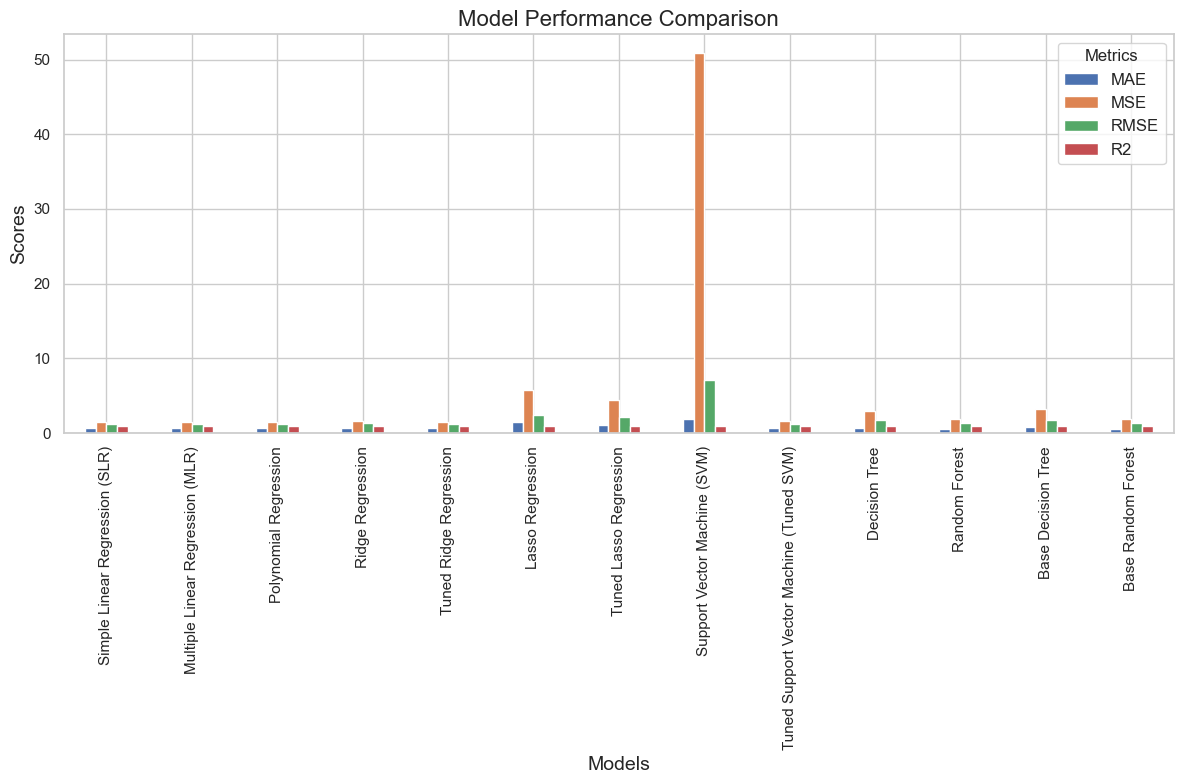

In [54]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Convert model_comparison back to a normal DataFrame if the index was set
model_comparison.reset_index(inplace=True)

# Set the model name as the index for better plotting
model_comparison.set_index('Model', inplace=True)

# Plotting the metrics for visual comparison
plt.figure(figsize=(12, 8))
model_comparison[['MAE', 'MSE', 'RMSE', 'R2']].plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Metrics', fontsize=12)
plt.tight_layout()
plt.show()

#### 2. Box Plot for Model Metrics Distribution:

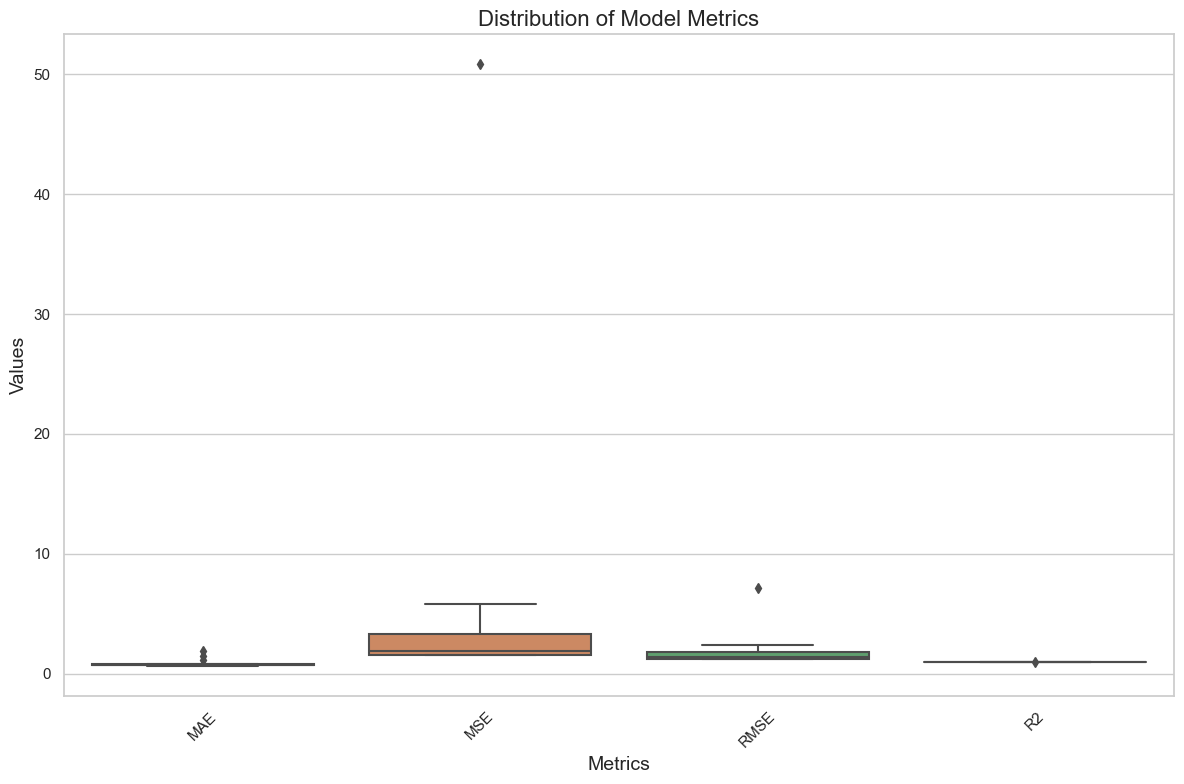

In [55]:
# Reset index for boxplot
model_comparison.reset_index(inplace=True)

# Melt the DataFrame for easier plotting with seaborn
model_melted = model_comparison.melt(id_vars='Model', value_vars=['MAE', 'MSE', 'RMSE', 'R2'])

# Box plot for the metrics
plt.figure(figsize=(12, 8))
sns.boxplot(data=model_melted, x='variable', y='value')
plt.title('Distribution of Model Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3. Heatmap of Model Metrics:

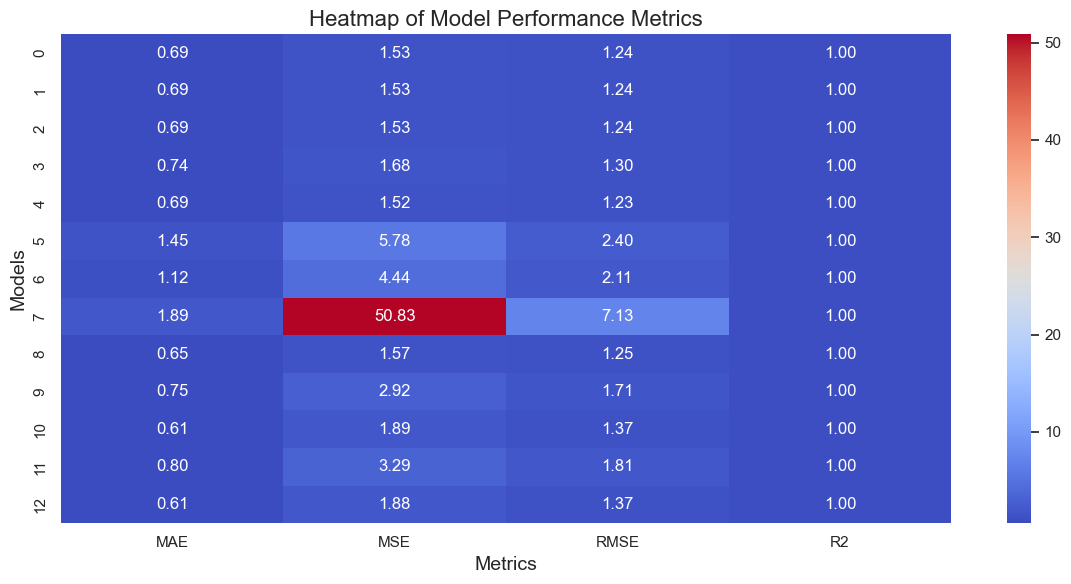

In [56]:
# Create a heatmap of the metrics
plt.figure(figsize=(12, 6))
sns.heatmap(model_comparison[['MAE', 'MSE', 'RMSE', 'R2']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Model Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.tight_layout()
plt.show()


### Model Performance Summary

**Best Performing Models:**

- Random Forest (Base Random Forest):
MAE: 0.6135
MSE: 1.8822
RMSE: 1.3719
R² Score: 0.9998

- Tuned Support Vector Machine (Tuned SVM):
MAE: 0.6520
MSE: 1.5662
RMSE: 1.2515
R² Score: 0.9999

- Tuned Ridge Regression:
MAE: 0.6946
MSE: 1.5229
RMSE: 1.2341
R² Score: 0.9999

**Notable Insights:**

- The Random Forest model achieved the lowest MAE, indicating it has the smallest average error in predictions. Its high R² score (0.9998) suggests that it explains nearly all the variance in the data.
- The Tuned Support Vector Machine performed significantly better than the non-tuned version, demonstrating the importance of hyperparameter tuning.
- Ridge and Lasso Regression performed reasonably well, especially after tuning, but they had higher MAE and RMSE compared to the best-performing models.

**Underperforming Models:**

- Support Vector Machine (SVM) had the highest MAE (1.8943) and MSE (50.8326), indicating that it did not perform well without tuning.
- The Lasso Regression also showed relatively poor performance compared to the other models.